# Churn rate analysis of the fitness center “Culturist - Data Scientist”

**Project Description:** The fitness center chain "Culturist - Data Scientist" is developing a user engagement strategy based on analytical data. A common issue faced by fitness clubs and other service-oriented businesses is customer churn. Therefore, this metric will be analyzed in this analytical survey.

**Research Objective:** To conduct an analytical research and prepare an action plan for customer retention increase, including churn rate prediction and clients clusterization. 

**Sources:** A set of data that includes information from one month prior to customer churn and the actual churn event for a specific month. The dataset includes the following fields (gym_churn.csv). *Columns:*

- 'gender' — Gender;
- 'Near_Location' — Residence or work in the area where the fitness center is located;
- 'Partner' — Employee of the club's partner company (collaboration with companies whose employees can receive discounts on memberships);
- 'Promo_friends' — Fact of initial registration under the "bring a friend" promotion;
- 'Phone' — Availability of a contact phone number;
- 'Age' — Age;
- 'Lifetime' — Time since the first contact with the fitness center (in months).
- 'Contract_period' — Duration of the current active membership (month, 6 months, year);
- 'Month_to_end_contract' — Time until the end of the current active membership (in months);
- 'Group_visits' — Fact of attending group trainings;
- 'Avg_class_frequency_total' — Average frequency of visits per week over the entire duration of the membership;
- 'Avg_class_frequency_current_month' — Average frequency of visits per week for the previous month;
- 'Avg_additional_charges_total' — Total revenue from other services offered by the fitness center: café, sports goods, cosmetic and massage services.
- 'Churn' — Fact of churn in the current month.

**Main steps:**

1. Performing primary data analysis
2. Preprocessing the data
3. Performing detailed EDA
4. Building churn prediction model
5. Clustering clients
6. Preparing overall conclusions of the research and recommendations for improving customer service

## Primary data analysis

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [5]:
data = pd.read_csv('C:/Users/as100/Documents/Portfolio/gym_churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [6]:
data.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [7]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [8]:
data.duplicated().sum()

0

In [9]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


**Summary:** The input data contains no duplicates or missing values. The dataframe has a total of 4000 rows. No changes to data types are required.

- Gender: The average value is 0.51, indicating that approximately half of the clients are male and the other half are female.
- Distance to center: The average value is 0.845, suggesting that most clients live or work close to the fitness center.
- Partner employee: The average value is 0.487, meaning that nearly half of the clients are employees of partner companies.
- Friend referral: The average value is 0.308, indicating that about 30.8% of clients have taken advantage of the "Refer a Friend" promotion.
- Phone: A high average value of 0.903 shows that almost all clients provided their contact phone numbers.
- Membership period: The average value is 4.68, which may indicate that many clients chose memberships for several months (ranging from 1 month to 12 months).
- Group trainings: The average value is 0.412, showing that not all clients participate in group trainings.
- Age: The average age of clients is approximately 29 years.
- Additional client expenses: The average value is approximately 146.94, indicating additional expenses incurred by clients.
- Contract end period: The average value is approximately 4.32 months until the contract ends.
- Lifetime: The average time since the first interaction is approximately 3.72 months, which may suggest that most clients started their activity recently.
- Visit frequency (Total) and Visit frequency (Current): The average values are approximately 1.88 and 1.77, showing how often clients attend trainings. A slight decrease in the current month may indicate potential retention issues.

## EDA

### Mean values for "Churn" group and "Non-Churn" group

In [13]:
mean_values = data.groupby('Churn').mean()
mean_values

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


### Visualizations of Churn groups features

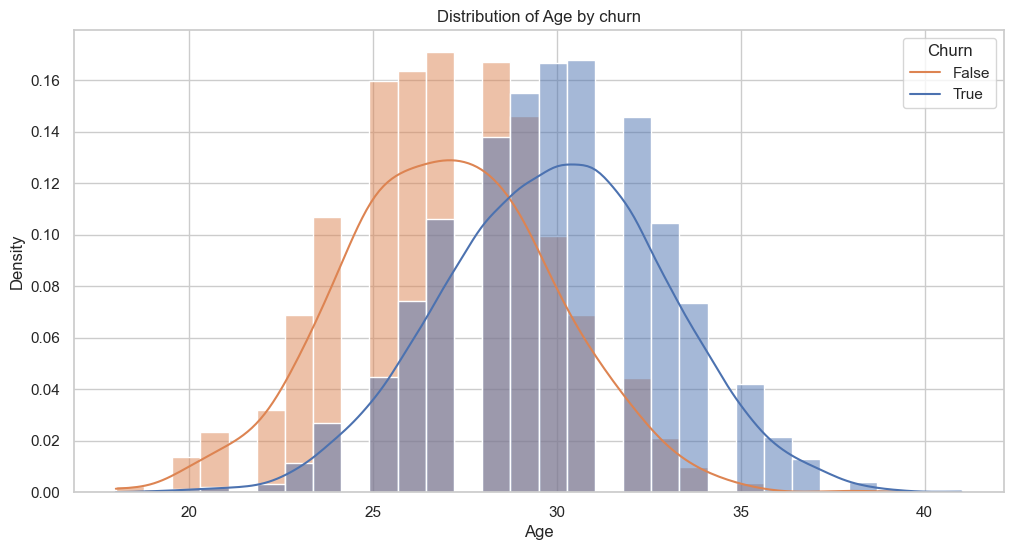

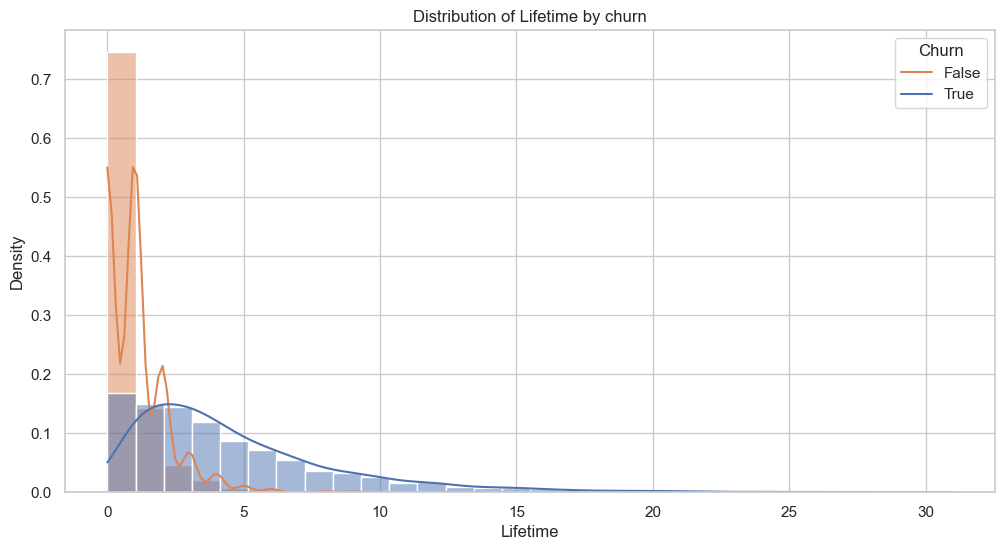

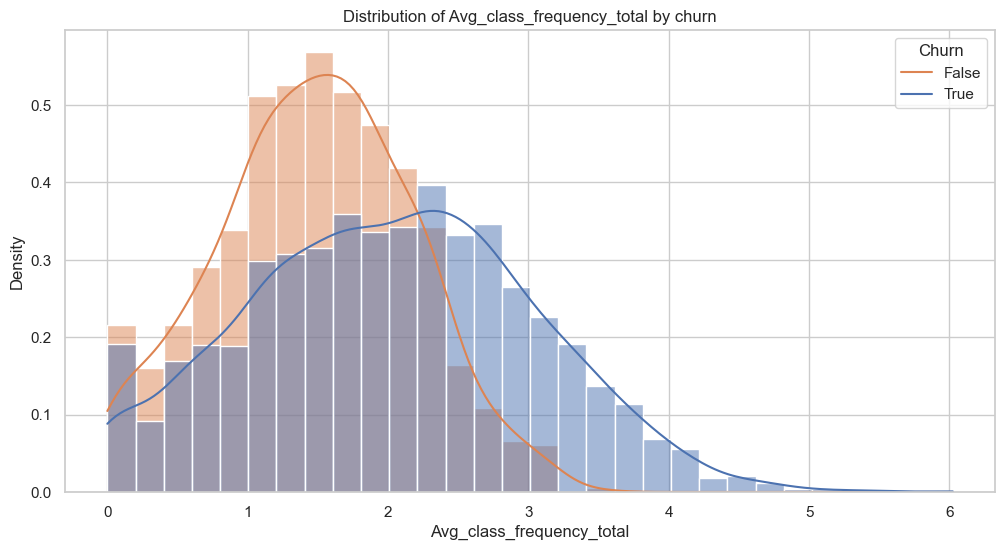

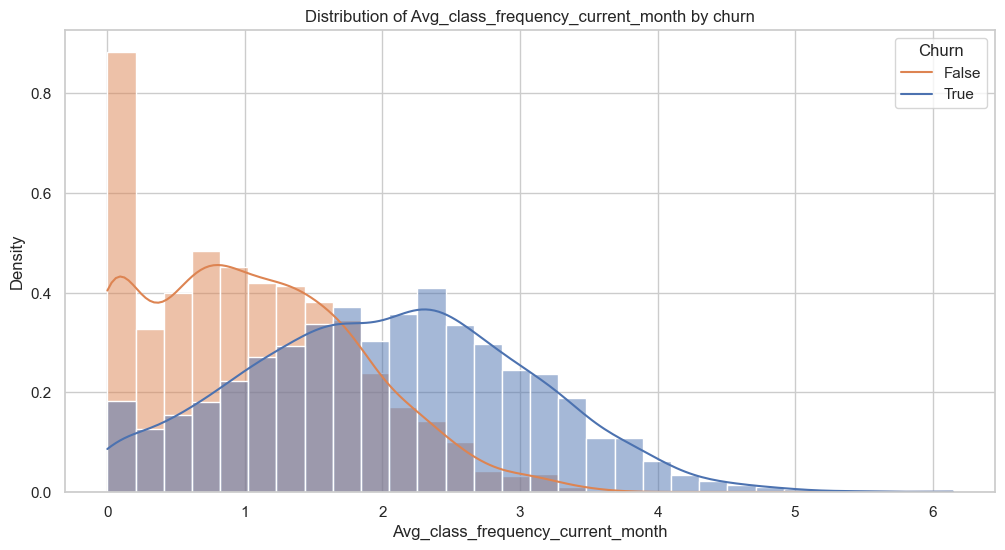

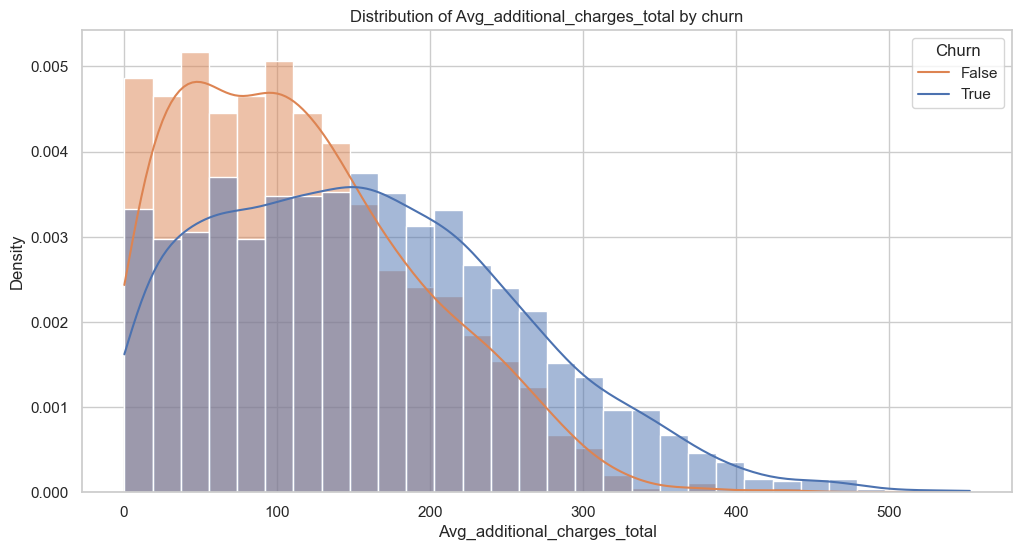

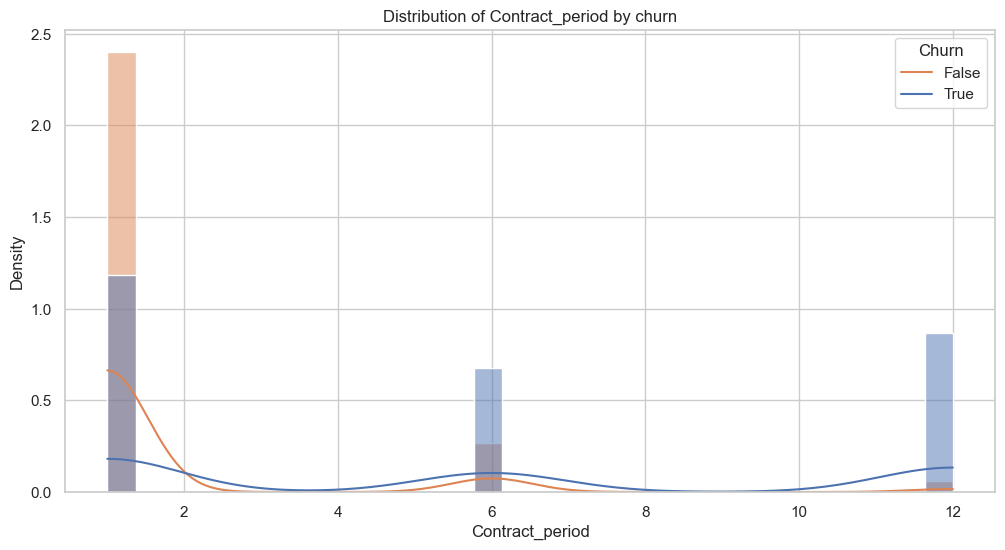

In [15]:
sns.set(style="whitegrid")

# numerical features visualization function
def plot_feature_distribution(feature):
    plt.figure(figsize=(12, 6))
    sns.histplot(data=data, x=feature, hue="Churn", bins=30, kde=True, stat="density", common_norm=False)
    plt.title(f'Distribution of {feature} by churn')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='Churn', labels=['False', 'True'])
    plt.show()

features_to_plot_numerical = ['Age', 'Lifetime', 'Avg_class_frequency_total', 
                              'Avg_class_frequency_current_month', 
                              'Avg_additional_charges_total', 
                              'Contract_period']

for feature in features_to_plot_numerical:
    plot_feature_distribution(feature)

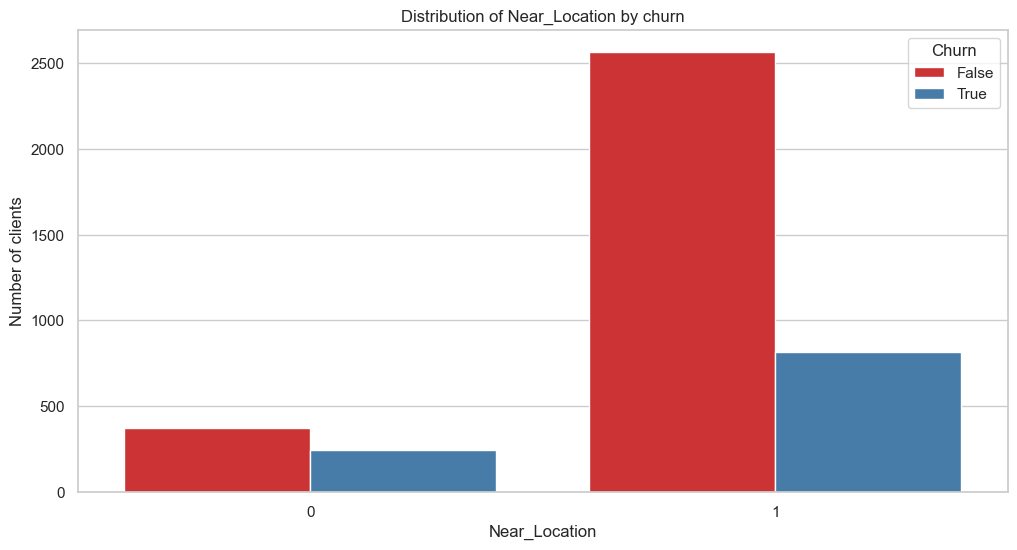

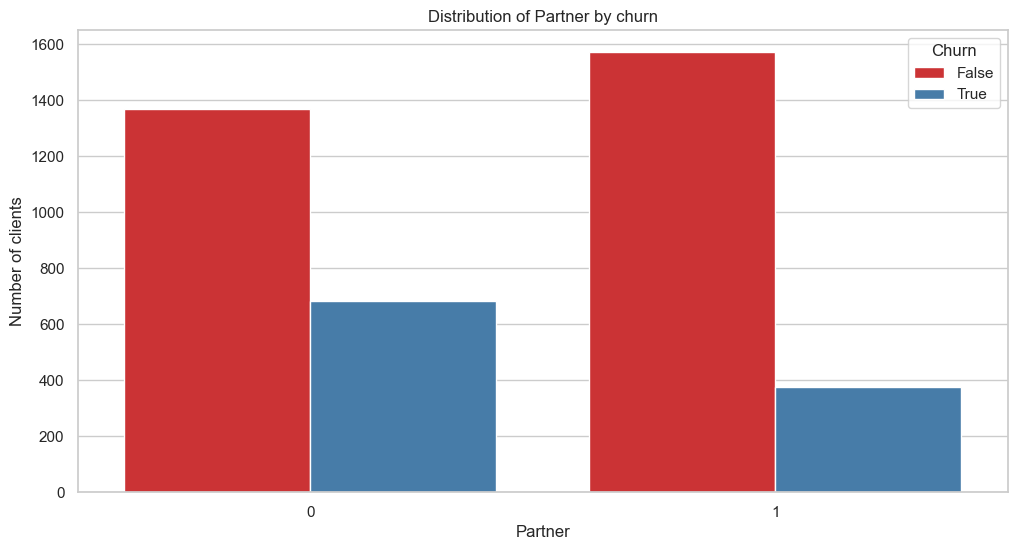

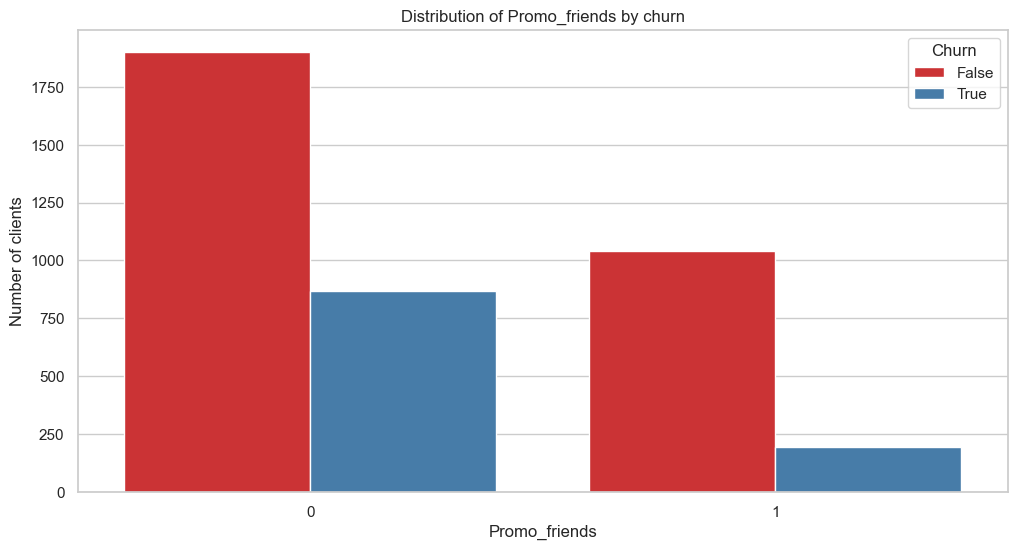

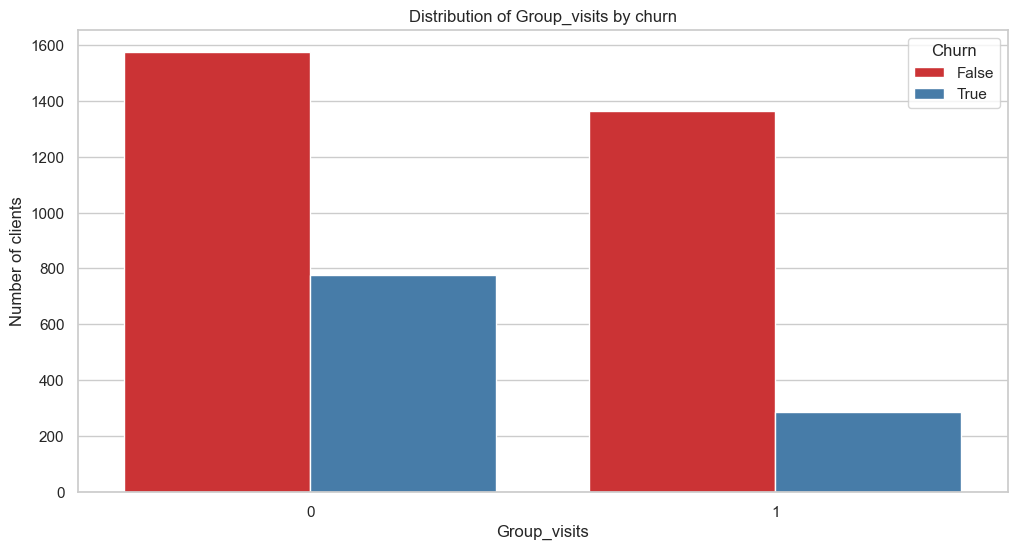

In [16]:
# categorical features visualization function
def plot_categorical_distribution(feature):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, x=feature, hue="Churn", palette='Set1')
    plt.title(f'Distribution of {feature} by churn')
    plt.xlabel(feature)
    plt.ylabel('Number of clients')
    plt.legend(title='Churn', labels=['False', 'True'])
    plt.show()

features_to_plot_categorical = ['Near_Location', 'Partner', 'Promo_friends', 'Group_visits']

for feature in features_to_plot_categorical:
    plot_categorical_distribution(feature)

### Correlation analysis

In [18]:
correlation_matrix = data.corr(method='pearson')
correlation_matrix

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


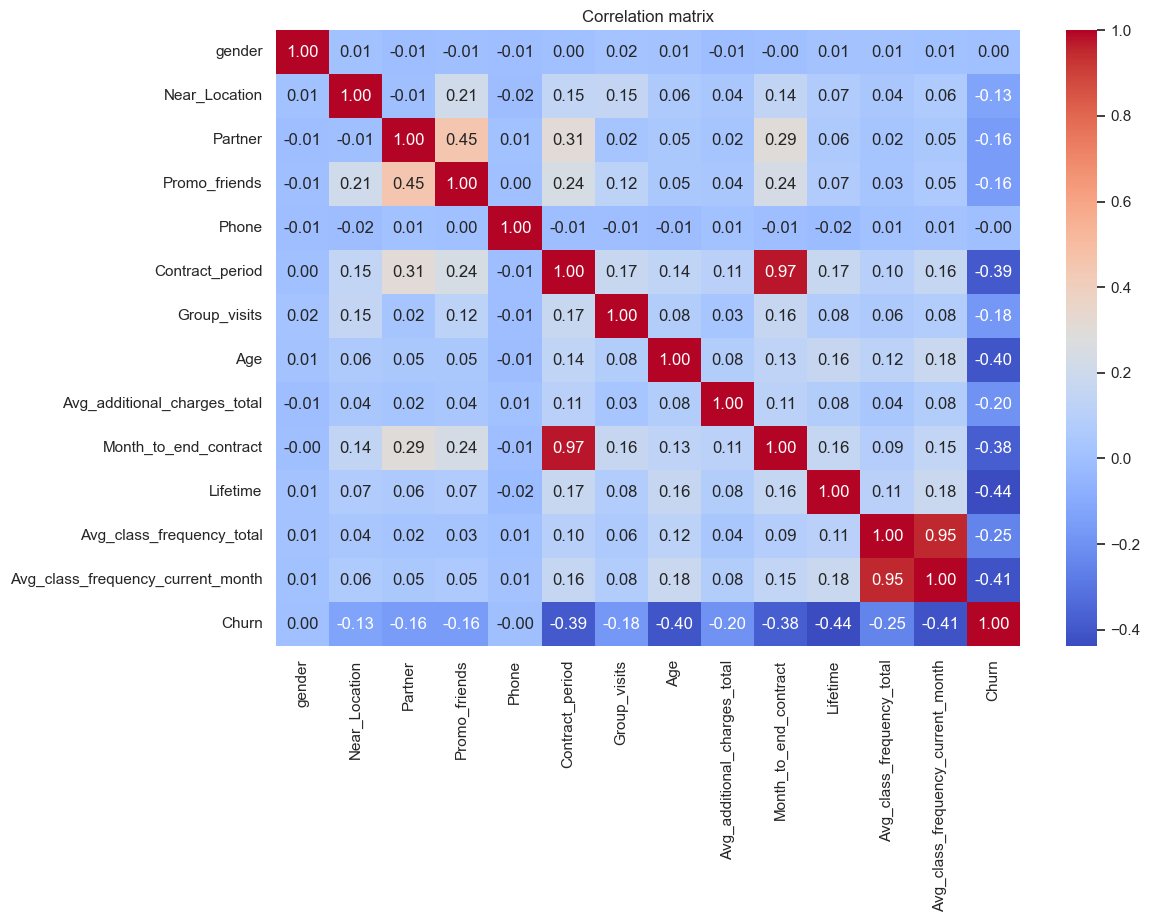

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix')
plt.show()

**Summary:**

1. Gender: Gender does not show a significant difference in terms of churn, making it an insignificant indicator. The matrix above confirms the absence of a correlation between gender and churn, with a coefficient of 0.0007.
2. Distance to center: The average value for those with negative churn is 0.873, while for those with positive churn it is 0.768. This metric also shows a slight negative correlation of -0.128. The visualization indicates that clients with negative churn tend to live or work near the fitness center.
3. Partner company: The average value is 0.534195 (negative churn) vs. 0.355325 (positive churn). The correlation of -0.158 supports the conclusion that clients employed by partner companies have a lower churn rate. The visualization shows that employees of partner companies are more likely to remain customers of the fitness center.
4. Friend referral: The average value is 0.353522 (negative churn) vs. 0.183789 (positive churn). The correlation of -0.162 confirms that clients who used the "Refer a Friend" promotion are less likely to churn. The visualization also shows that clients brought by friends tend to stay longer.
5. Phone: The average values are nearly identical (0.903709 and 0.902922). As seen from the correlation of -0.0012, having a specified contact phone number does not affect client churn.
6. Membership period: The average value is 5.747193 (negative churn) vs. 1.728558 (positive churn). A strong positive correlation of 0.973 between contract duration and client retention confirms that clients inclined towards long-term contracts are less prone to churn. The visualization shows that clients with longer contracts tend to stay significantly longer.
7. Group trainings: The average value is 0.464103 (negative churn) vs. 0.268615 (positive churn). The correlation of -0.175 highlights the relationship between group trainings and client retention. The visualization shows that clients participating in group trainings are less likely to churn.
8. Age: The average value is 29.976523 (negative churn) vs. 26.989632 (positive churn). The matrix shows that age has a negative correlation of -0.404 with churn. The visualization confirms that clients who decline contract prolongation are generally younger.
9. Additional expenses: The average value is 158.445715 (negative churn) vs. 115.082899 (positive churn). The correlation coefficient of -0.198 confirms that clients who spend more on additional services are less likely to churn, indicating a high level of retention.
10. Contract end period: The average value is 5.283089 (negative churn) vs. 1.662582 (positive churn). A strong negative correlation of -0.389 indicates that clients with non-long-term contracts are more likely to leave the club, confirming the importance of developing a special approach toward this group of clients.
11. Lifetime: The average value is 4.711807 (negative churn) vs. the average value of 0.990575 (positive churn). The correlation matrix shows that client lifetime has a negative rate of -0.438: new clients tend to leave the club more often, highlighting the need to develop a retention strategy for this group.
12. Visit frequency (Total): The average value is 2.024876 (negative churn) vs. 1.474995 (positive churn). Correlation coefficients of -0.249 and -0.412 confirm that low visit frequency is associated with client churn. The visualization shows that clients who attend training more frequently are more likely to remain customers of the club.

## ML model of churn prediction

In [22]:
X = data.drop(columns=['Churn'])
y = data['Churn']

# Transforming categorical variables into dummy variables
X = pd.get_dummies(X, drop_first=True)

# Saving random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic regression

In [24]:
# Training logistic regression
log_reg = LogisticRegression(random_state=42, solver='liblinear')
log_reg.fit(X_train, y_train)

# Prediction
y_pred_logreg = log_reg.predict(X_test)

# Evaluating metrics for logistic regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)

print("Logistic regression:")
print(f"Accuracy: {accuracy_logreg:.4f}")
print(f"Precision: {precision_logreg:.4f}")
print(f"Recall: {recall_logreg:.4f}\n")

Logistic regression:
Accuracy: 0.9237
Precision: 0.8895
Recall: 0.7970



### Random forest

In [26]:
# Training a random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prediction
y_pred_rf = rf_model.predict(X_test)

# Evaluating metrics for random forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

print("Random forest:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}\n")

Random forest:
Accuracy: 0.9100
Precision: 0.8495
Recall: 0.7822



**Summary:** In this step, a binary classification model was built to predict customer churn based on the provided data. The process involved the following stages:

1. Data preparation: The data was divided into the target variable, `Churn`, and the feature set, `X`. To ensure the model was trained correctly, all categorical variables were converted into dummy variables using the `pd.get_dummies()` function.
2. Splitting into Training and Test Sets: Utilizing the `train_test_split()` function, the data was divided into a training set `(X_train, ytrain)` and a validation set `(X_test, ytest)`, with the parameter `random_state=42` set to ensure reproducibility.
3. Model training: Two models were trained: logistic regression and random forest. Each model was trained on the training set and then used for prediction on the validation set.
4. Metric evaluation: For each model, accuracy, precision and recall metrics were calculated. The results indicated that:
    - Accuracy: Logistic regression achieved a higher accuracy (0.9237) compared to random forest (0.9100). However, the difference between these values is minimal.
    - Precision: Logistic regression also demonstrated a higher precision level (0.8895) in comparison to random forest (0.8495). This indicates that among all positive predictions, logistic regression made fewer errors.
    - Recall: Logistic regression exhibited a higher recall rate (0.7970) than random forest (0.7822). This suggests that logistic regression is better at recognizing positive cases (churned customers).

## Building a dendrogram

In [29]:
# Separating the target variable
X = data.drop(columns=['Churn'])
X = pd.get_dummies(X, drop_first=True)

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

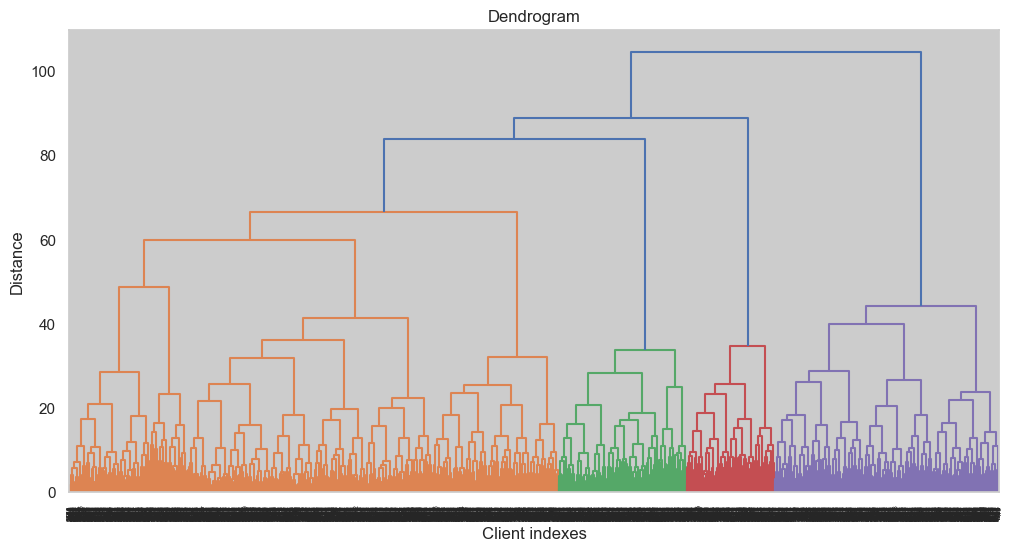

In [30]:
# Constructing a distance matrix
linked = linkage(X_scaled, method='ward')

# Building a dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', labels=data.index.tolist(), distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram")
plt.xlabel("Client indexes")
plt.ylabel("Distance")
plt.show()

In [31]:
# Defining the number of clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adding Cluster column to main DataFrame
data['Cluster'] = clusters
data['Cluster'] = data['Cluster']+1

In [32]:
data['Cluster'].value_counts()

Cluster
1    1283
5     894
3     646
2     633
4     544
Name: count, dtype: int64

## Cluster analysis

### Mean values for each cluster

In [35]:
cluster_means = data.groupby('Cluster').mean()
cluster_means

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Cluster,,,,,,,,,,,,,,
1,0.484801,0.698363,0.301637,0.007015,0.899454,1.733437,0.255651,28.074825,127.131782,1.657833,2.089634,1.256531,0.991781,0.587685
2,0.494471,0.947867,0.791469,0.998420,0.906793,2.740916,0.431280,28.903633,139.456908,2.540284,3.529226,1.619489,1.488508,0.285940
3,0.464396,0.913313,0.766254,0.493808,0.925697,10.495356,0.506192,30.091331,164.190347,9.484520,4.693498,2.888801,2.886027,0.013932
4,0.547794,0.937500,0.742647,0.424632,0.863971,11.194853,0.575368,29.720588,167.670439,10.347426,4.818015,1.154578,1.139605,0.042279
5,0.568233,0.878076,0.178971,0.048098,0.914989,2.120805,0.456376,29.993289,155.602830,2.013423,4.844519,2.667290,2.650122,0.105145


### Density of the metrics by cluster

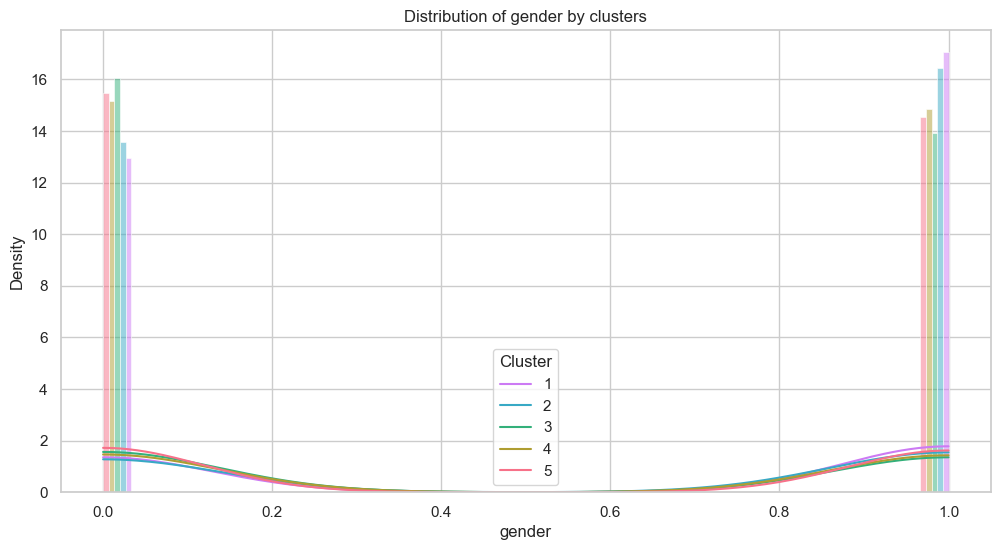

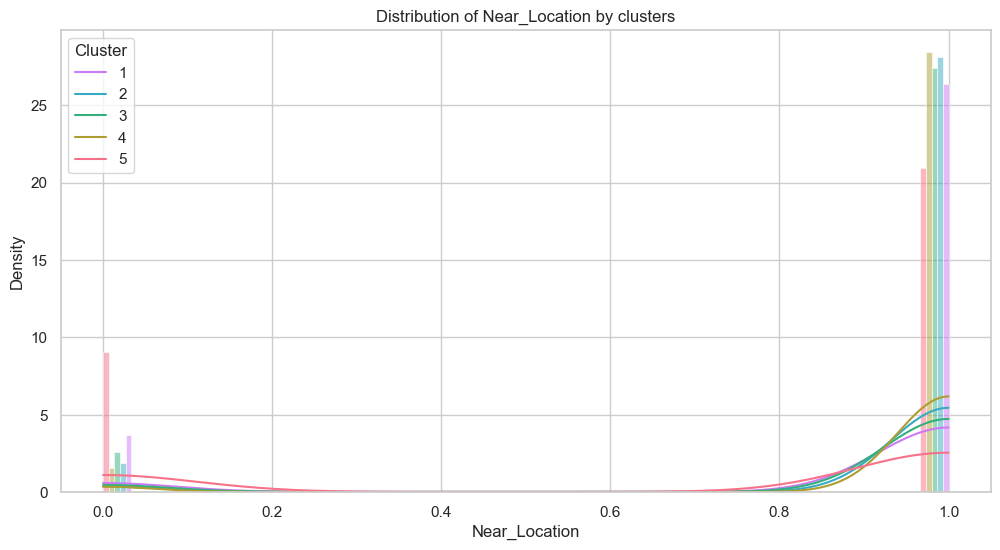

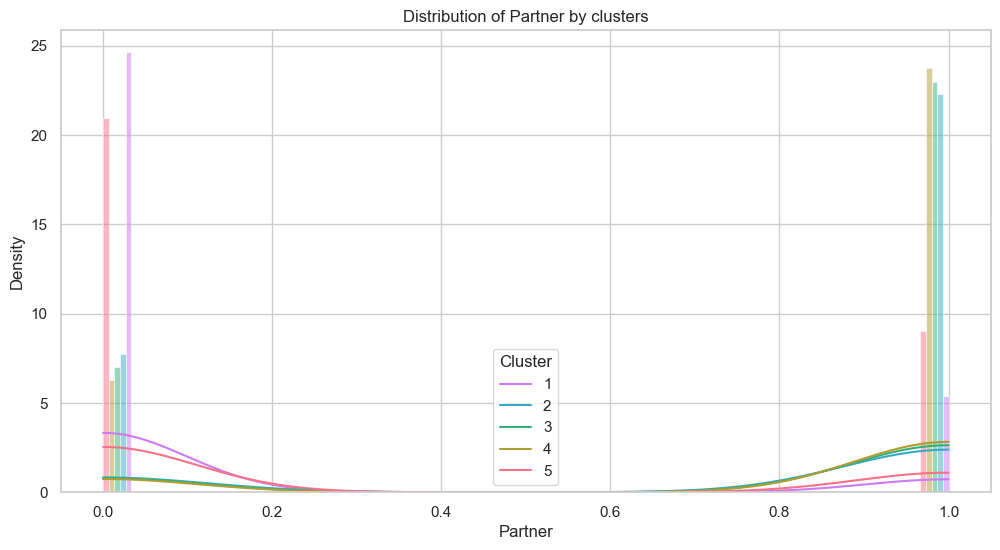

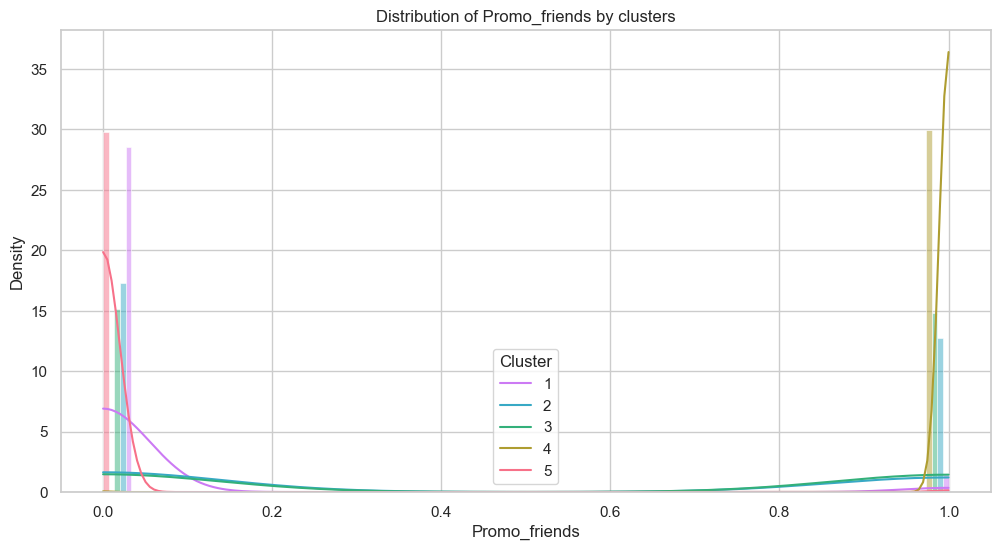

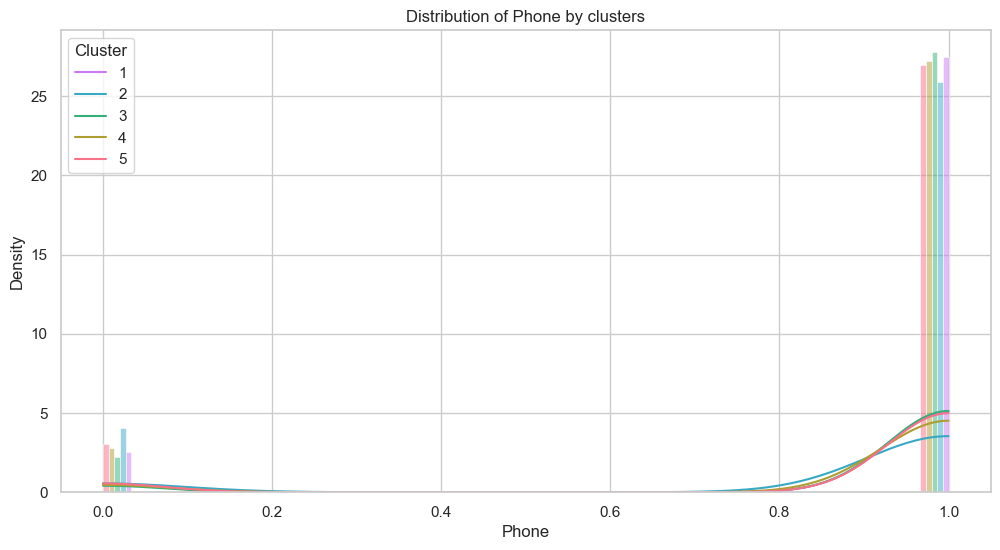

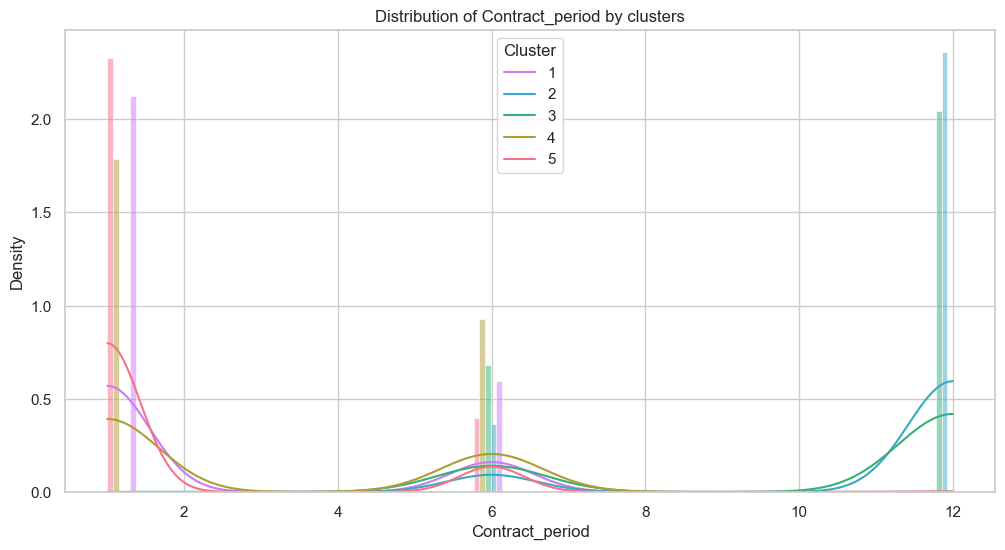

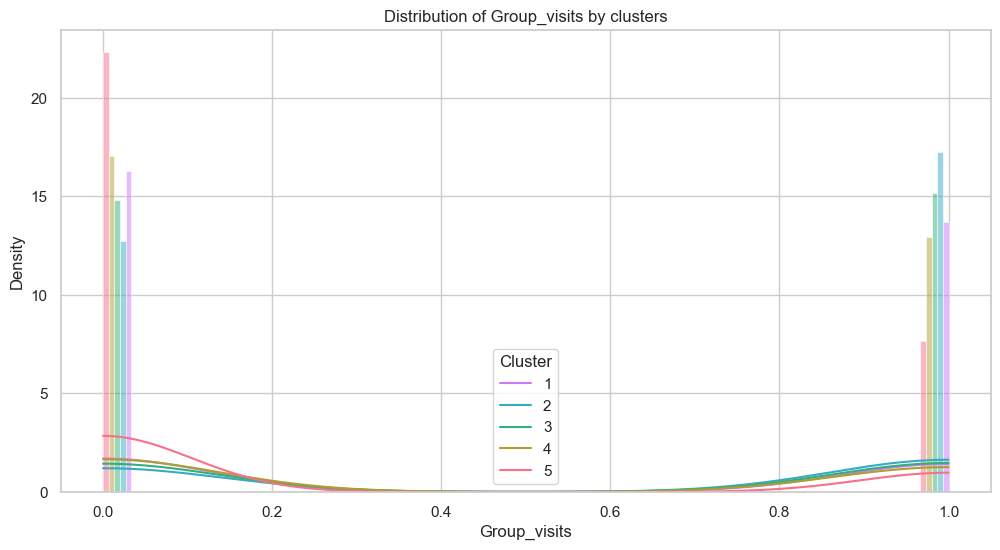

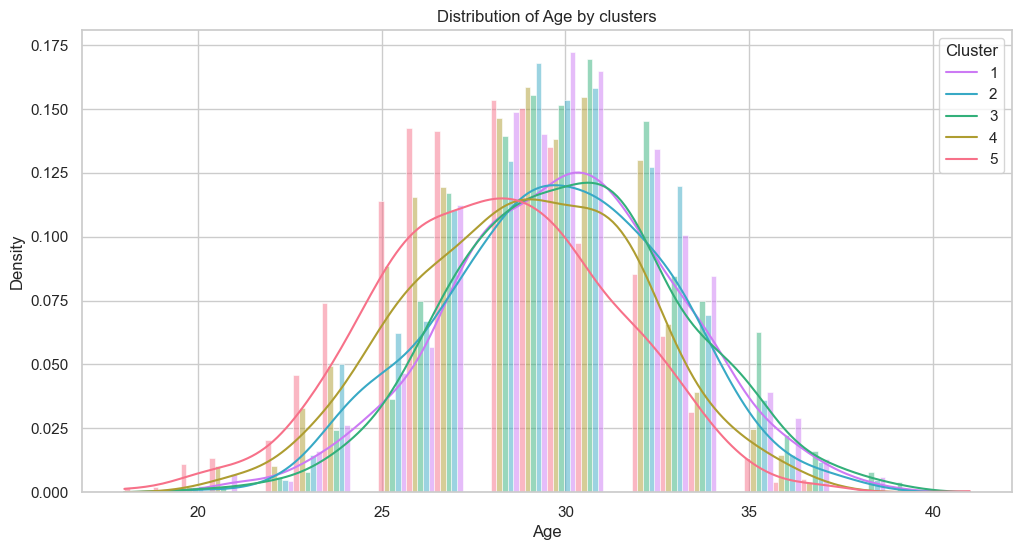

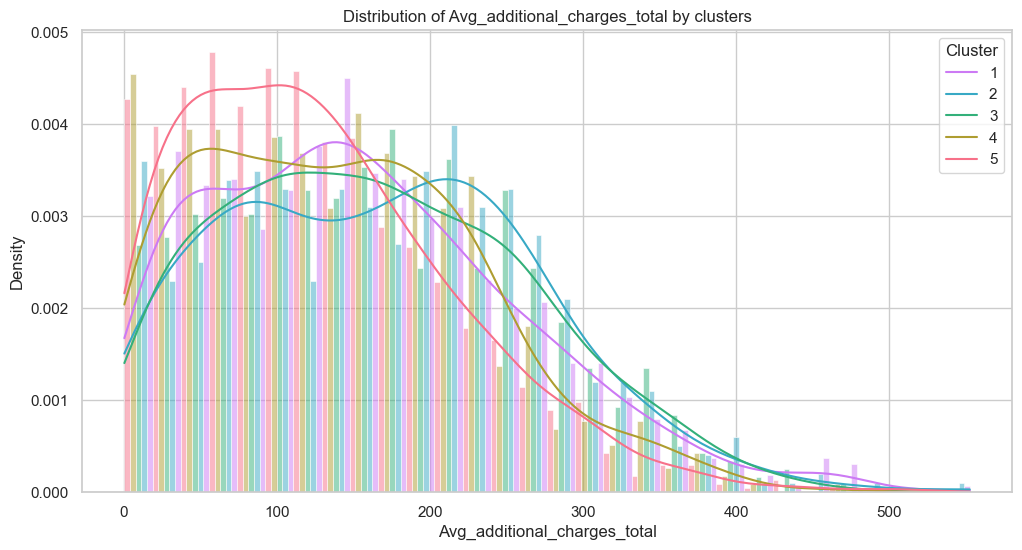

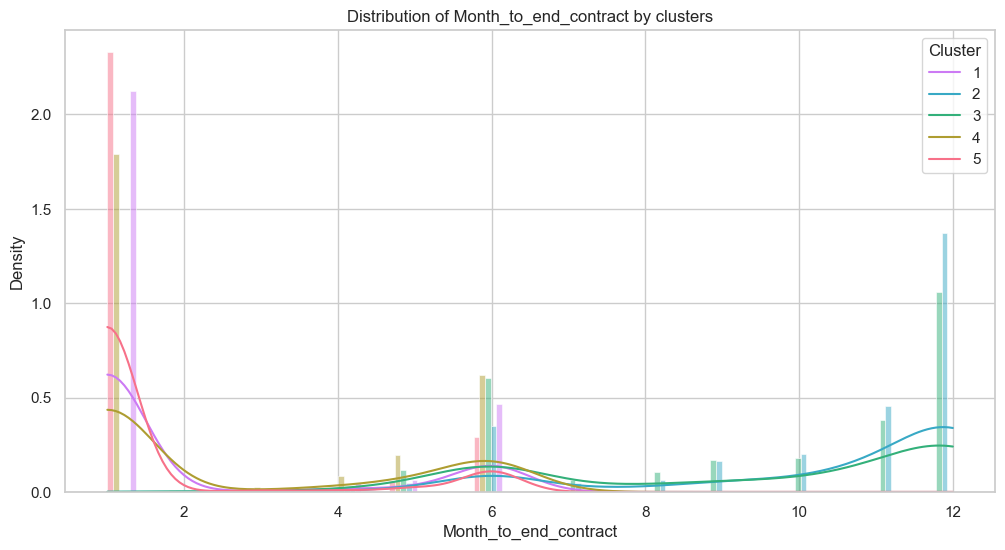

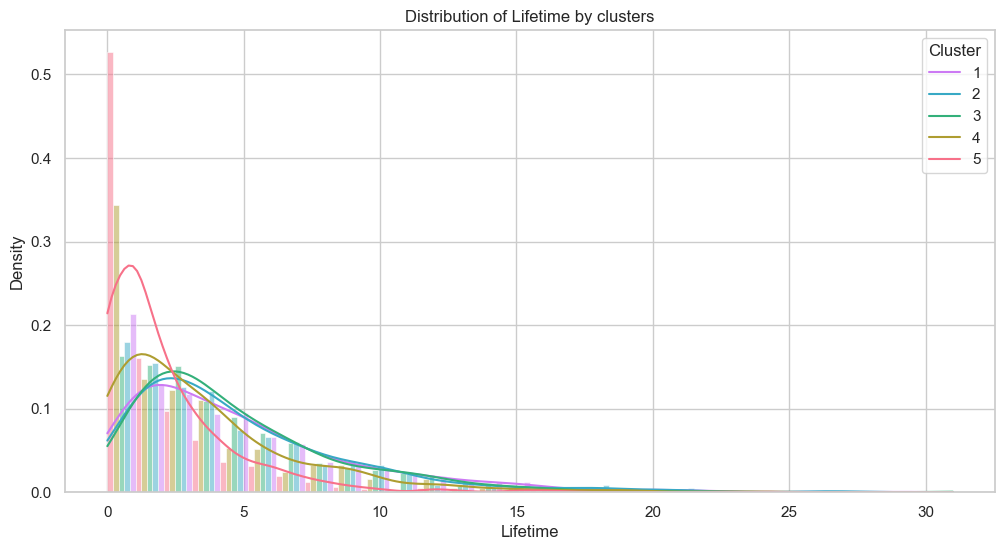

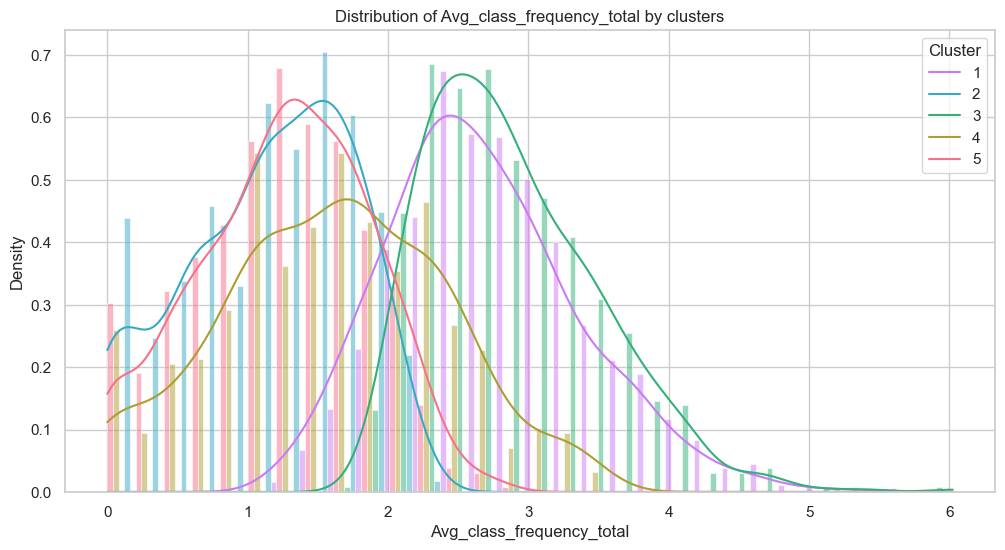

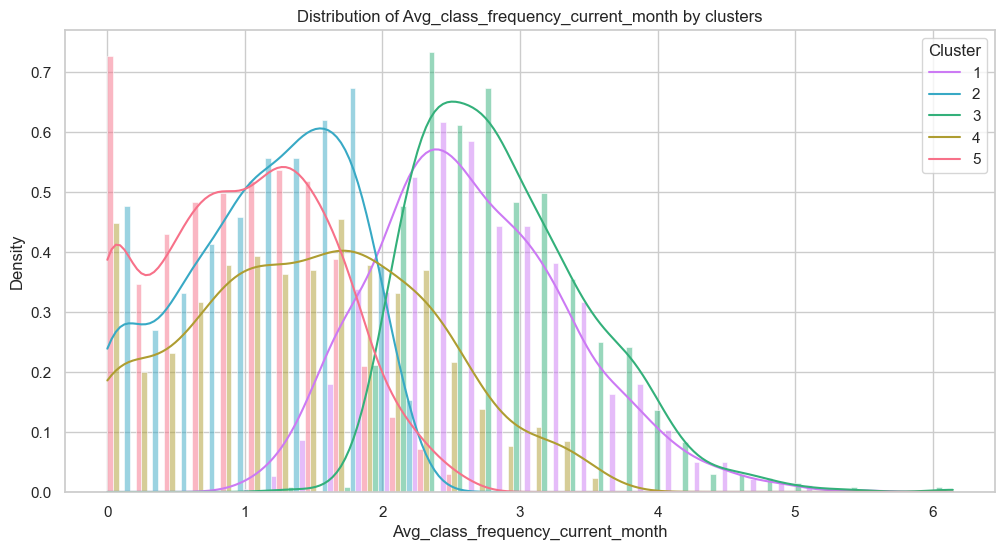

In [37]:
data['Cluster'] = data['Cluster'].astype('category')

for feature in X.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=data, x=feature, hue='Cluster', bins=30, kde=True, 
                 stat='density', common_norm=False, multiple='dodge', palette='husl')

    plt.title(f'Distribution of {feature} by clusters')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='Cluster', labels=data['Cluster'].cat.categories)
    plt.show()

### Churn rate distribution by cluster

In [39]:
churn_rate_by_cluster = data.groupby('Cluster', observed=True)['Churn'].mean()
print(churn_rate_by_cluster)

Cluster
1    0.587685
2    0.285940
3    0.013932
4    0.042279
5    0.105145
Name: Churn, dtype: float64


**Summary:** In this step, customer clustering was performed to identify different user groups based on their characteristics. 

*The following steps were completed:*
1. Data preparation: The Churn column was excluded and dummy variables were created for all categorical features.
2. Standardization: The data was standardized to eliminate the impact of scale differences.
3. Dendrogram: A dendrogram was constructed to visualize the data structure, helping to hypothesize the total number of potential clusters.
4. K-Means clustering: The K-Means model was trained using five clusters.
5. Cluster analysis: The mean values of features for each cluster were examined, revealing significant differences between customer groups.
6. Feature distribution: Distribution graphs for features were created to visualize differences between clusters.
7. Churn rate: The churn rate for each cluster was calculated, allowing to identificate clusters with high and low churn risk.
   
*Characteristics description:*
- Gender: The gender values in the clusters range from 0.485 to 0.555, indicating that gender is not a significant variable for clustering.
- Proximity: Cluster 1 (0.949) has the highest score, meaning a large proportion of customers are located near the fitness center. Cluster 4 (0.718) shows the lowest proximity, suggesting that customers are farther away from the fitness center.
- Partnership engagement: Clusters 1 (0.829) and 3 (0.738) demonstrate a high level of partnership engagement, while Cluster 2 (0.263) has the lowest one, indicating a lack of connections with partners.
- Referral promo: Cluster 1 shows the highest value (0.998), confirming that most customers joined through friend recommendations. Clusters 2 (0.052) and 4 (0.018) have low scores, indicating lesser reliance on referrals.
- Phone availability: All clusters, except for Cluster 5, have a value of 1.0, indicating that customers prefer to communicate via phone. Cluster 4 (0.0) shows the use of other communication channels.
- Membership duration: Cluster 3 (11.85) is characterized by the longest contracts, indicating high customer loyalty. Cluster 4 (1.91) has the lowest value, which may signal low loyalty.
- Group trainings: Cluster 3 shows the highest average participation in group classes (0.546), suggesting more active customer engagement.
- Age: Customer age ranges from 28 to 30 across all clusters, indicating a homogeneous customer base in terms of age.
- Additional costs: Cluster 3 demonstrates high level of additional costs (163.51), indicating a tendency among customers to consume supplementary services.
- Time until membership expiration: Cluster 3 has the highest value (10.81), reflecting a significant remaining contract duration, while Cluster 4 (1.82) is close to contract completion, indicating a risk of churn.
- Customer lifetime value: Clusters 2 and 3 show the highest values for fixed customer lifetime duration, while other clusters fall within a range of 2-3 units.
- Visit frequency: Clusters 2 and 3 exhibit high visit frequencies, indicating greater customer activity.
- Churn rate: Cluster 3 demonstrates the lowest churn rate (0.021), indicating high customer retention. Clusters 1 (0.246) and 5 (0.267) have higher rates, suggesting a group of customers with a high risk of churn.

*Thus, we can draw the following conclusions about the clusters:*
1. Cluster 1: A customer segment with high loyalty. Customers are referred by friends and are located near the fitness center. They engage with partner companies.
2. Cluster 2: Customers lacking active partnerships and friend referrals, indicating a high likelihood of churn and lower engagement with services.
3. Cluster 3: The most loyal group of customers, characterized by long contracts, high additional spending, and a low risk of churn. This group represents the target audience for retention strategies.
4. Cluster 4: Customers with the lowest loyalty and a high risk of churn, also with the closest contract expiration dates. Measures are needed to enhance satisfaction and engagement levels.
5. Cluster 5: An average level of engagement and churn. This group requires further research to identify specific needs and develop customer retention strategies.

## Final summary with recommendations

### Summary

1. Overall customer characteristics:
    - Balanced gender distribution: An average value of 0.51 indicates a balanced ratio between male and female clients, suggesting that the fitness center is equally popular among both genders.
    - Centralized location: The average distance from the center indicates that most clients live or work close to the fitness center.
<div>

</div>

2. Customer base profile:
    - Partnership with companies: Nearly half of the clients are employees of partner companies, indicating successful collaboration and the potential for additional joint programs.
    - Low participation in group trainings: The average value shows that less than half of the clients participate in group trainings. This presents an opportunity for improvement, as participation could enhance client engagement and satisfaction.

<div>

</div>

3. Customer churn:
   - Dependence on contract duration: Clients with long-term memberships exhibit significantly lower churn rates. Differences between clusters show that clients with longer terms have a substantially lower churn rate, while those with short contracts experience a churn rate of 57.3%.
   - Role of additional costs: High additional costs among loyal clients highlights their engagement and willingness to invest in the services provided, which is crucial for understanding client behavior patterns.

<div>

</div>

4. Churn prediction model: Evaluation metrics showed that logistic regression has a better metrics than random forest. This indicates that in current case logistic regression modeling approach is more effective. However, the values differ slightly, so it is still recommended to build the 2 models in combination to reveal deeper insights.

<div>

</div>

5. Customer Clustering. Analysis using K-Means identified 5 clusters:
    - Cluster 1: Highly loyal clients who come through referrals and located near the fitness center. They are also associated with partner companies.
    - Cluster 2: Clients without active connections to partners and friend referrals, indicating a high risk of churn and low engagement with services.
    - Cluster 3: The most dedicated clients with long contracts and high spending on additional services. This group is key for retention strategies.
    - Cluster 4: Clients with the lowest loyalty and a high risk of churn, having the shortest time until contract expiration. Measures are needed to enhance their satisfaction.
    - Cluster 5: Clients with an average level of engagement and churn. Further research is required to understand their needs and develop retention strategies.

### Recommendations

1. Targeted marketing based on clusters: Develop tailored offers for clients in Cluster 1 to strengthen their loyalty, including bonuses or discounts for long-term contracts. This personalized approach can enhance their connection to the fitness center.
2. Programs for high-risk clusters: Implement special promotions and personalized campaigns for clients in Clusters 2 and 4, such as free trial memberships or exclusive events. These initiatives can help to re-engage clients who show signs of potential churn.
3. Active retention efforts: Schedule regular events for clients in Cluster 4 to understand the reasons behind their low loyalty. This may include surveys and personal meetings to gather feedback and address concerns directly.
4. Encouragement of referral programs: Increase focus on referral and partnership programs to enhance the effectiveness of the "Bring a Friend" initiative, attracting more loyal clients through existing customer networks.
5. Systematic analysis and feedback collection: Establish ongoing monitoring of customer satisfaction through regular feedback collection. This will enable quick responses to potential issues and foster long-term relationships with clients.